# PROBLEMA: CLASIFICACION DE DIGITOS USANDO EL DATASET MNIST
## Entrada: Una imagen de un digito
## Salida:  El número del digito
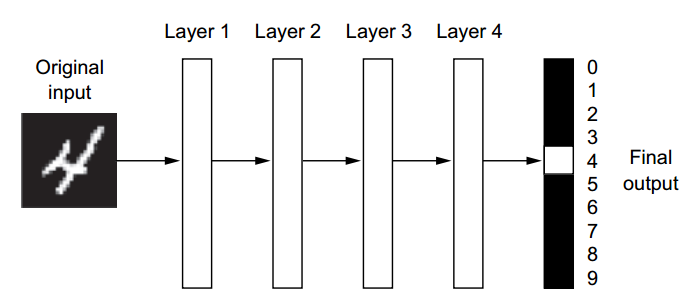

## **Ingestion**

In [ ]:
from keras.datasets import mnist                                                                                               
(x_train, y_train), (x_test, y_test) = mnist.load_data()  

11501568/11490434 [==============================] - 0s 0us/step


## La funcion load_data retorna:
- **x_train**: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

- **y_train**: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

- **x_test**: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

- **y_test**: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

## **EDA**: Analisis exploratorio de datos

### Dimensiones del dataset

In [ ]:
print(f"El dataset de entrenamiento tiene {x_train.shape[0]} imágenes con dimensiones {x_train.shape[1:]} ")
print(f"El dataset de prueba tiene {x_test.shape[0]} imágenes")

El dataset de entrenamiento tiene 60000 imágenes con dimensiones (28, 28) 
El dataset de prueba tiene 10000 imágenes


In [ ]:
label_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [ ]:
import matplotlib.pyplot as plt

### Samples por digito

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

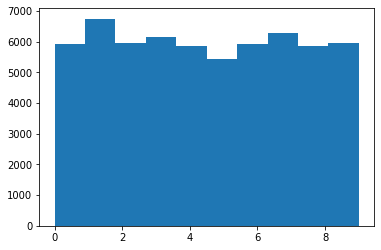

In [ ]:
plt.hist(y_train) 

(array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974.,
        1009.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

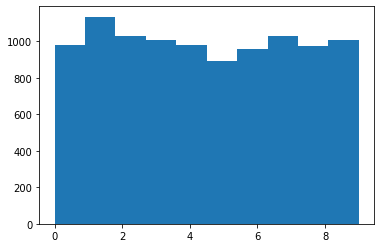

In [ ]:
plt.hist(y_test) 

### Mostrar la matriz que representa la imagen (en escala de grises) de un digito

En una imagen en escala de grises cada punto de la imagen se almacena en un Byte, donde su valor numérico representa su tono, que puede oscilar entre el blanco (255) y el negro (0). Esto quiere decir que es una imagen donde existen 256 tonos de gris (de 0 a 255).
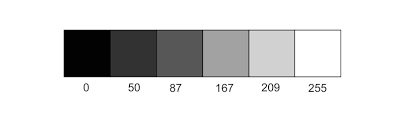

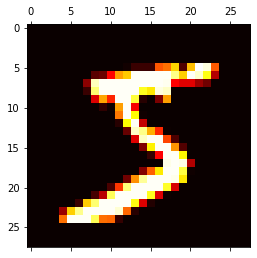

In [ ]:
plt.matshow(x_train[0], cmap=plt.cm.hot)


In [ ]:
# Una matriz 28 x 28, cada elemento puede tomar un valor entre 0 y 255.
print(x_train[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### Visualizando un conjunto del dataset

In [ ]:
def show_images_in_matrix(width, heigth, images, labels):
  plt.figure(figsize=[3,3])
  for i in range(width*heigth):   
    plt.subplot(width, heigth, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.hot)
    plt.xlabel(label_names[labels[i]])
  plt.show()


### Mostrando dataset de entrenamiento

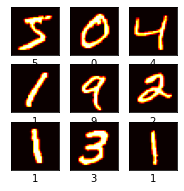

In [ ]:
width = 3
heigth = 3
samplesSize = width*heigth
show_images_in_matrix(width,heigth, x_train[0:samplesSize], y_train[0:samplesSize])

### Mostrando dataset de prueba

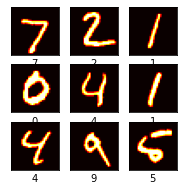

In [ ]:
width = 3
heigth = 3
samplesSize = width*heigth
show_images_in_matrix(width,heigth, x_test[0:samplesSize], y_test[0:samplesSize])

## **Preprocesing**

In [ ]:
from keras.utils import np_utils
import numpy as np

# Convert 'y' dataset to categorical
num_classes = 10
y_train_preprocesed = np_utils.to_categorical(y_train, num_classes)                                   
y_test_preprocesed = np_utils.to_categorical(y_test, num_classes)

def preprocesing(dataset):
  scaled = dataset.astype("float32") / 255
  reshaped = np.expand_dims(scaled, -1)
  return reshaped

def preprocessing_nn(dataset):
  # normalize the pixel values from [0, 255] to [-0.5, 0.5]
  scaled = (dataset / 255) - 0.5
  # Flatten the images.
  reshaped = scaled.reshape((-1, 28*28))
  return reshaped


                                                                    
                      

### Para usar convolutional nerwork

In [ ]:
x_preprocesed_train = preprocesing(x_train)
x_preprocesed_test = preprocesing(x_test)


inputShape = x_preprocesed_train.shape[1:]
print(inputShape)

(28, 28, 1)


### Para usar simple network

In [ ]:
x_preprocesed_train = preprocessing_nn(x_train)
x_preprocesed_test = preprocessing_nn(x_test)


inputShape = x_preprocesed_train.shape[1:]
print(inputShape)

(784,)


## **Modeling**

In [ ]:
from keras.layers import Input, InputLayer, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Model, Sequential

def build_model():
 return Sequential([
  Dense(64, activation='relu', input_shape=(inputShape)),
  Dense(64, activation='relu'),
  Dense(num_classes, activation='softmax'),
])

def build_model_convolutional():
  return Sequential(
    [
        InputLayer(input_shape=inputShape),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(num_classes, activation="softmax"),
    ]
  )                                        


### Construimos un modelo 
Before we can begin training, we need to configure the training process. We decide 3 key factors during the compilation step:

- The **optimizer**. We’ll stick with a pretty good default: the **Adam gradient-based optimizer**. Keras has many other optimizers you can look into as well.
- The **loss function**. Since we’re using a Softmax output layer, we’ll use the Cross-Entropy loss. Keras distinguishes between binary_crossentropy (2 classes) and **categorical_crossentropy** (>2 classes), so we’ll use the latter. See all Keras losses.
- A list of **metrics**. Since this is a classification problem, we’ll just have Keras report on the accuracy metric.

In [ ]:
model = build_model()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])        
model.summary()  


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


### Training and evaluation

 BATCH SIZE * EPOCHS = SAMPLES DATASET

In [ ]:
history = model.fit(x_preprocesed_train, y_train_preprocesed, batch_size=128, epochs=5, verbose=1,                      
          validation_data=(x_preprocesed_test, y_test_preprocesed)) 

Epoch 1/5
469/469 [==============================] - 16s 4ms/step - loss: 0.7961 - accuracy: 0.7602 - val_loss: 0.2357 - val_accuracy: 0.9316
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2337 - accuracy: 0.9316 - val_loss: 0.1790 - val_accuracy: 0.9476
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1777 - accuracy: 0.9477 - val_loss: 0.1625 - val_accuracy: 0.9495
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1471 - accuracy: 0.9562 - val_loss: 0.1365 - val_accuracy: 0.9592
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1206 - accuracy: 0.9638 - val_loss: 0.1277 - val_accuracy: 0.9616


### Evaluate model

In [ ]:
score = model.evaluate(x_preprocesed_test, y_test_preprocesed, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.12772014737129211
Test accuracy: 0.9616000056266785


### Predict an image

In [ ]:
def predict(anIndexImage):
  plt.imshow(x_test[anIndexImage], cmap=plt.cm.hot)
  predicted = model.predict(x_preprocesed_test[anIndexImage: anIndexImage + 1])
  digit_predicted = np.argmax(predicted, axis=1)
  plt.xlabel(digit_predicted[0])
  plt.show()



Un error en prediccion


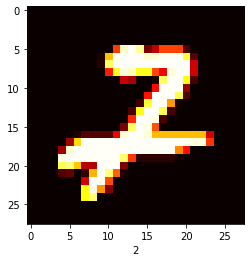

In [ ]:
anIndexImage = 9009
print("Un error en prediccion")
predict(anIndexImage)


Una prediccion correcta


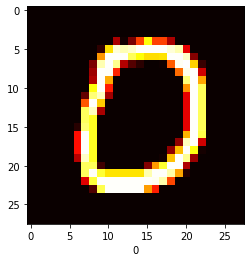

In [ ]:
print("Una prediccion correcta")
predict(10)

## Visualizing evaluation

Text(0.5, 1.0, 'Loss Curves')

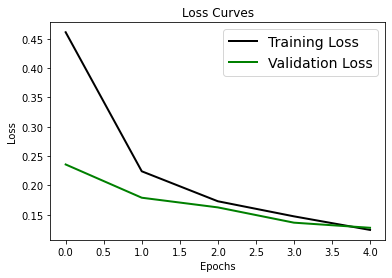

In [ ]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

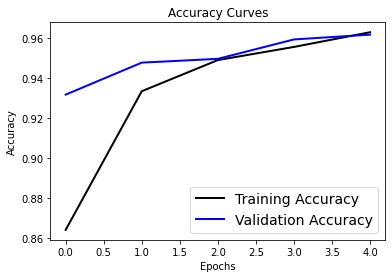

In [ ]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

# TAREA:

- MOSTRAR LAS IMAGENES EN UNA MATRIZ, POR EJEMPLO 3 X 3
- ¿ES PROBLEMA DE CLASIFICACION ? Si es un problema de clasificacion de imagenes para lo cual parece que se uso el método de clasificación de números manuscritos basado en distancia Euclidiana a prototipos ya que el porcentaje de error es minimo



### Guias:
- https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
- https://victorzhou.com/blog/keras-neural-network-tutorial/